## Analyzing content

First we install the packages we are going to need.

In [1]:
# install.packages(c("tidytext","dplyr","ggplot2"))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Next we load them.

In [2]:
library(tidytext)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




We load an old dataset of 400 Trump tweets which has been collected via `stream_tweets`.

In [3]:
load("trumpsowntweets.Rda")

Take a look at the data.

In [4]:
head(trumpsowntweets)

user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
<chr>,<chr>,<dttm>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
25073877,1110387923709579264,2019-03-26 03:48:05,realDonaldTrump,"Tom Fitton on @RealDonaldTrump Russia Mueller Probe: 'They've KNOWN There Was NO Collusion"" And, by the way, @DevinNunes is one of the most consequential congressmen in a generation... https://t.co/okdnHB6voK",Twitter for iPhone,139,NA,NA,NA,⋯,41022,7,2009-03-18 13:46:38,TRUE,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877/1550087458,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/874276197357596672/kUuht00m_normal.jpg
25073877,1110383915485810689,2019-03-26 03:32:10,realDonaldTrump,Christmas came early this week. https://t.co/ypqkZgRkeR,Twitter for iPhone,75,NA,NA,NA,⋯,41022,7,2009-03-18 13:46:38,TRUE,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877/1550087458,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/874276197357596672/kUuht00m_normal.jpg
25073877,1110381904417751041,2019-03-26 03:24:10,realDonaldTrump,"@realDonaldTrump Thank you Mr. President🇺🇸 for all of your sacrifice, your hard work, and your thoughtful leadership. It means so much to us to have a President who truly cares for and represents us so faithfully. God bless you and your wonderful family. Keep up the GREAT work. Love, America https://t.co/jM8BYXZaBu",Twitter for iPhone,139,NA,NA,NA,⋯,41022,7,2009-03-18 13:46:38,TRUE,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877/1550087458,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/874276197357596672/kUuht00m_normal.jpg
25073877,1110363093073301505,2019-03-26 02:09:25,realDonaldTrump,The Stanley Cup and the Caps with President Trump in the Oval Office. What a picture! https://t.co/lKwBz3F1YL,Twitter for iPhone,125,NA,NA,NA,⋯,41022,7,2009-03-18 13:46:38,TRUE,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877/1550087458,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/874276197357596672/kUuht00m_normal.jpg
25073877,1110362981756555264,2019-03-26 02:08:59,realDonaldTrump,A team of great champions! https://t.co/Pm5p9L6TaX,Twitter for iPhone,26,NA,NA,NA,⋯,41022,7,2009-03-18 13:46:38,TRUE,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877/1550087458,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/874276197357596672/kUuht00m_normal.jpg
25073877,1110362445326024704,2019-03-26 02:06:51,realDonaldTrump,"Hanging out in the Roosevelt Room, waiting to head into the oval office. #stanleycup @NHL @WhiteHouse @HockeyHallFame @Capitals 0 https://t.co/ut0vfjVwwz",Twitter for iPhone,139,NA,NA,NA,⋯,41022,7,2009-03-18 13:46:38,TRUE,https://t.co/OMxB0x7xC5,http://www.Instagram.com/realDonaldTrump,en,https://pbs.twimg.com/profile_banners/25073877/1550087458,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/874276197357596672/kUuht00m_normal.jpg


In [5]:
nrow(trumpsowntweets)

[1] 400

We clean up the text a bit by removing links (words starting with `http` or `https`).

In [6]:
trumpsowntweets$text <- gsub("http.*", "", trumpsowntweets$text)

In [7]:
trumpsowntweets$text <- gsub("https.*", "", trumpsowntweets$text)

We also have to clean up `&amp` which is a special html entity.

In [8]:
trumpsowntweets$text <- gsub("&amp;", "&", trumpsowntweets$text)

Now we split the text into single tokens (words).

In [9]:
trump_clean <- trumpsowntweets %>%
  dplyr::select(text) %>%
  unnest_tokens(word, text)

We can take a look:

In [10]:
head(trump_clean)

word
<chr>
tom
fitton
on
realdonaldtrump
russia
mueller


The tidytext package offers a list of English stopwords, which we can use:

In [11]:
data("stop_words")

Take a peek...

In [12]:
head(stop_words)

word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART


Our goal is to remove stopwords as they do not contain information we are interested in. Check how many words we have currently:

In [13]:
nrow(trump_clean)

[1] 11355

Now we remove stopwords using the `anti_join` function

In [14]:
cleaned_tweet_words <- trump_clean %>%
    anti_join(stop_words)

Joining, by = "word"



See how many words are left:

In [15]:
nrow(cleaned_tweet_words)

[1] 5207

Plot the most common words in the data 📊

Selecting by n



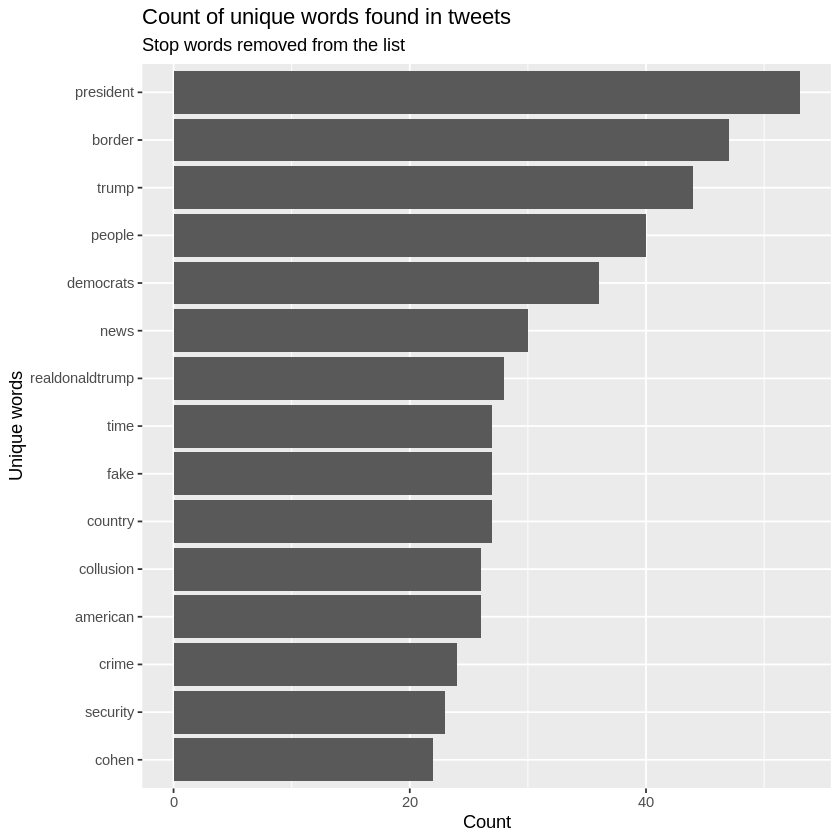

In [16]:
cleaned_tweet_words %>%
   count(word) %>%
   top_n(15) %>%
   mutate(word = reorder(word, n)) %>%
   ggplot(aes(x = word, y = n)) +
   geom_col() +
   xlab(NULL) +
   coord_flip() +
   labs(y = "Count",
        x = "Unique words",
        title = "Count of unique words found in tweets",
        subtitle = "Stop words removed from the list")